In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [5]:
df = pd.read_csv('AutoInsurance.csv')

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
print(df.shape[0]) #rows

9134


In [9]:
print(df.shape[1]) #columns

24


In [ ]:
df.info()

In [14]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace =True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [18]:
numerical_cols = df.select_dtypes(include=["int64", "float64"])

In [19]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [20]:
numerical_cols = numerical_cols.drop(["Number of Open Complaints", "Number of Policies"], axis=1)

In [22]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [23]:
# prompt: check null values

df.isnull().sum()


Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

<ipython-input-24-1374b2d5569d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CLV'])


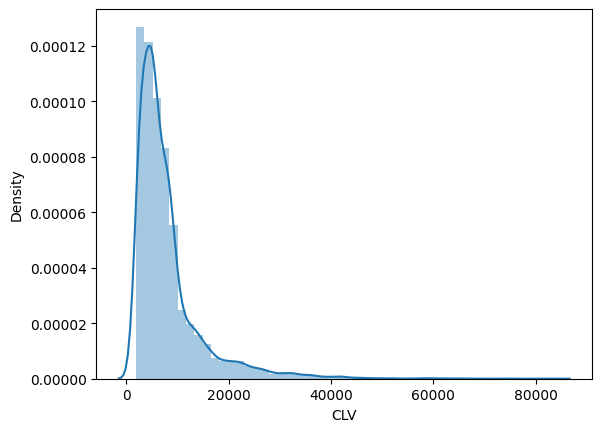

In [24]:
# prompt: check the distribution of clv column

sns.distplot(df['CLV'])
plt.show()


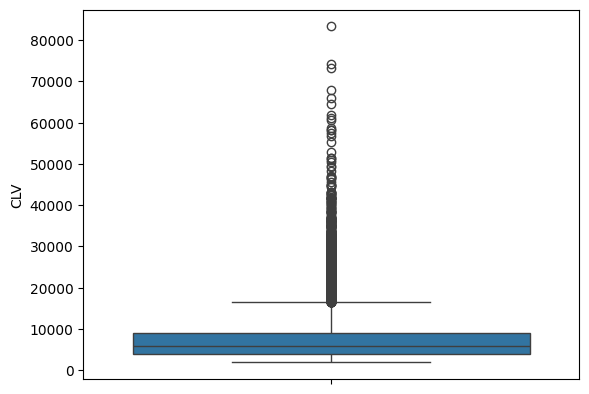

In [26]:
# prompt: check the outliers of clv  column through boxplot

sns.boxplot(df['CLV'])
plt.show()


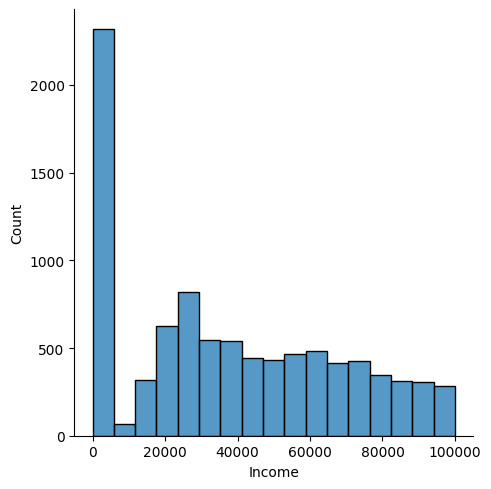

In [27]:
sns.displot(df["Income"])
plt.show()

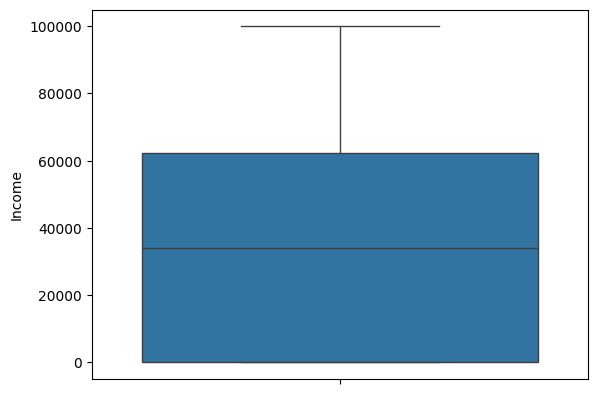

In [28]:
sns.boxplot(df["Income"])
plt.show()

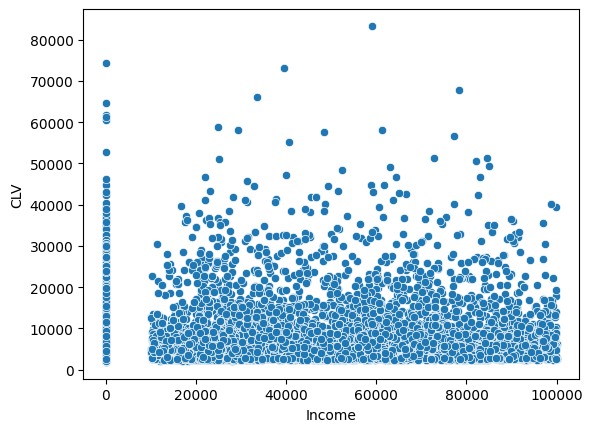

In [32]:
# prompt: create scatter chart with income and clv column

sns.scatterplot(x = df['Income'], y = df['CLV'])
plt.show()


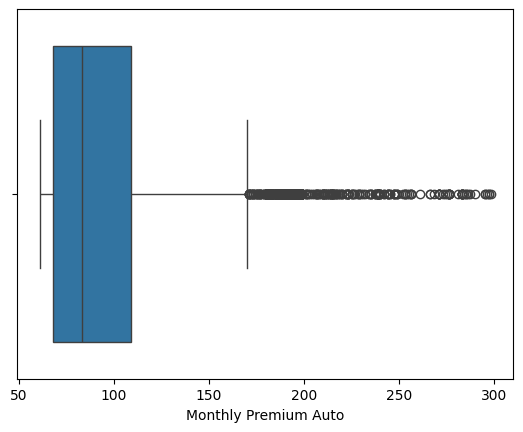

In [33]:
# prompt: create boxplot of monthly premium auto column

sns.boxplot(x = df['Monthly Premium Auto'])
plt.show()

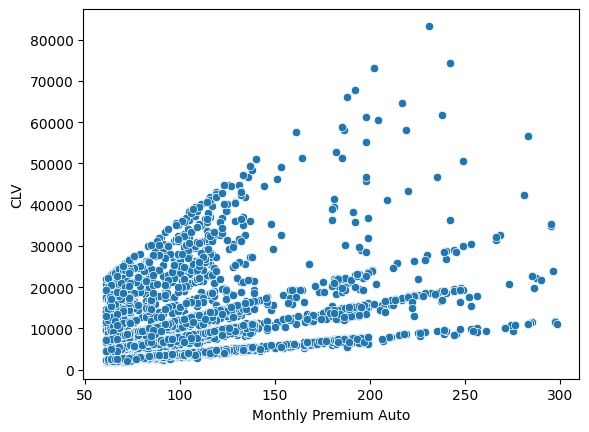

In [34]:
# prompt: create scatter chart with monthly premium auto column and clv column

sns.scatterplot(x = df['Monthly Premium Auto'], y = df['CLV'])
plt.show()


<ipython-input-39-b27c949b6b9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Last Claim'])


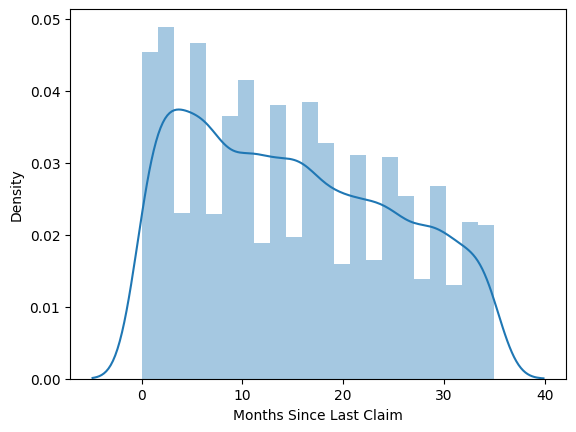

In [39]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

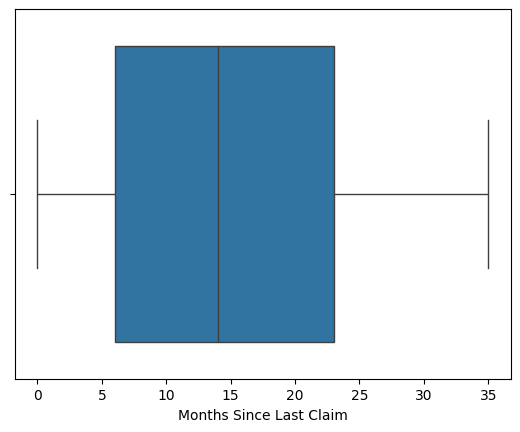

In [40]:
# prompt: create boxplot for Months Since Last Claim column

sns.boxplot(x = df['Months Since Last Claim'])
plt.show()


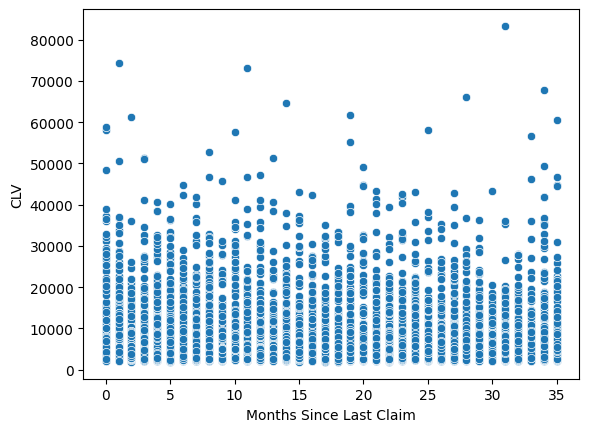

In [41]:
# prompt: create scatter chart for Months Since Last Claim with clv column

sns.scatterplot(x = df['Months Since Last Claim'], y = df['CLV'])
plt.show()


<ipython-input-45-4095dae5d782>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Policy Inception'])


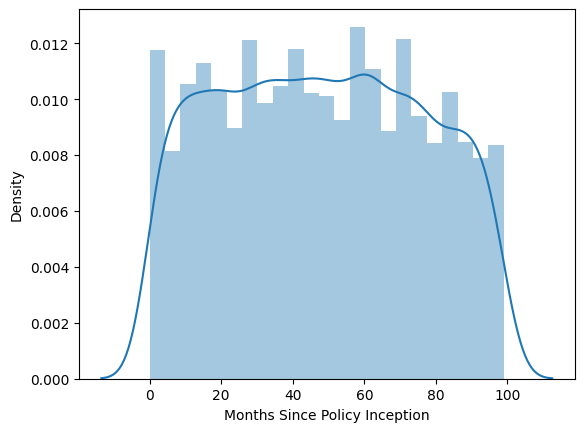

In [45]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

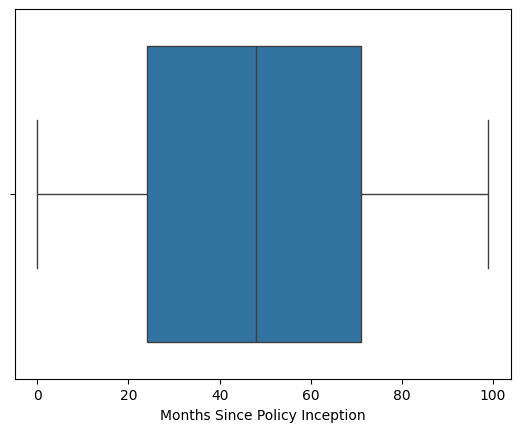

In [46]:
# prompt: create boxplot for Months Since Policy Inception column

sns.boxplot(x = df['Months Since Policy Inception'])
plt.show()


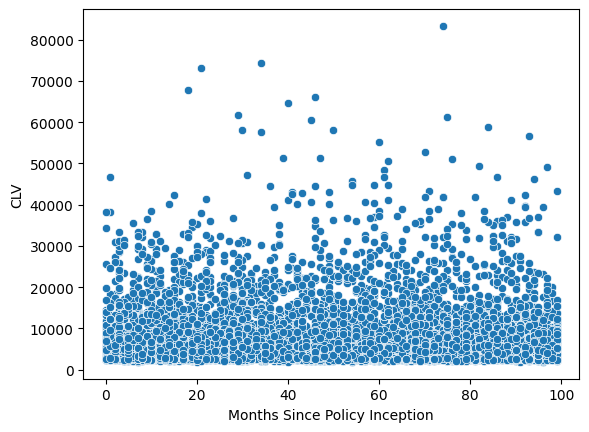

In [49]:
# prompt: create scatter chart for Months Since Policy Inception with clv

sns.scatterplot(x = df['Months Since Policy Inception'], y = df['CLV'])
plt.show()


<ipython-input-50-999d2774238b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Policy Inception'])


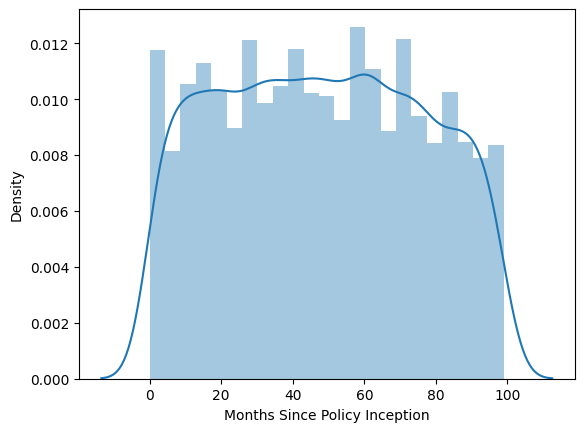

In [50]:
# prompt: create distplot with months since policy inception column

sns.distplot(df['Months Since Policy Inception'])
plt.show()


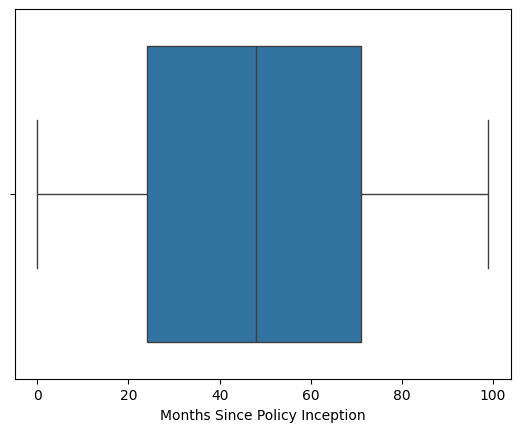

In [51]:
# prompt: create boxplot for Months Since Policy Inception

sns.boxplot(x = df['Months Since Policy Inception'])
plt.show()


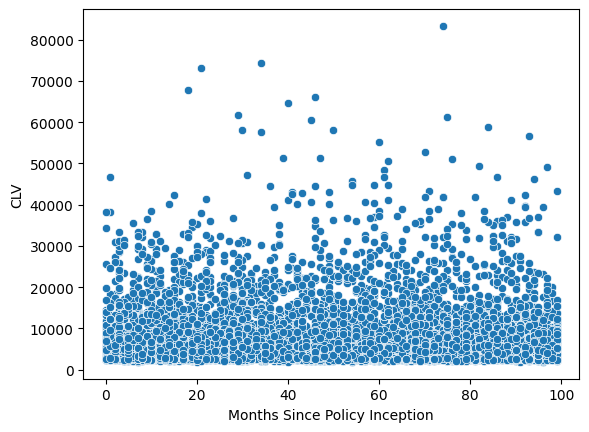

In [52]:
# prompt: create scatter chart for Months Since Policy Inception with clv column

sns.scatterplot(x = df['Months Since Policy Inception'], y = df['CLV'])
plt.show()


<ipython-input-53-085eda19f67c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Claim Amount'])


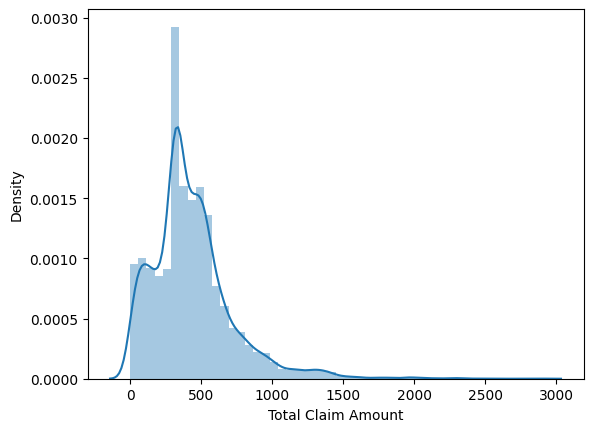

In [53]:
# prompt: create distplot for Total claim amount column

sns.distplot(df['Total Claim Amount'])
plt.show()


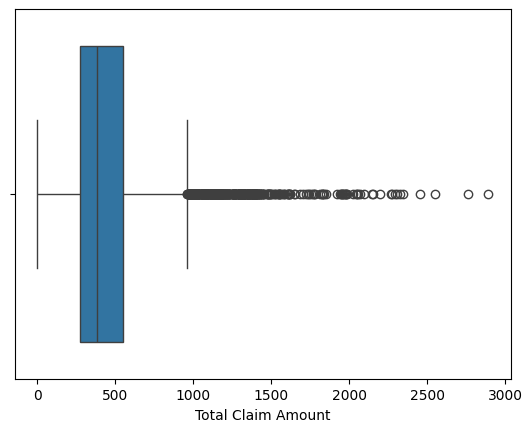

In [54]:
# prompt: create boxplot from Total Claim Amount column

sns.boxplot(x = df['Total Claim Amount'])
plt.show()


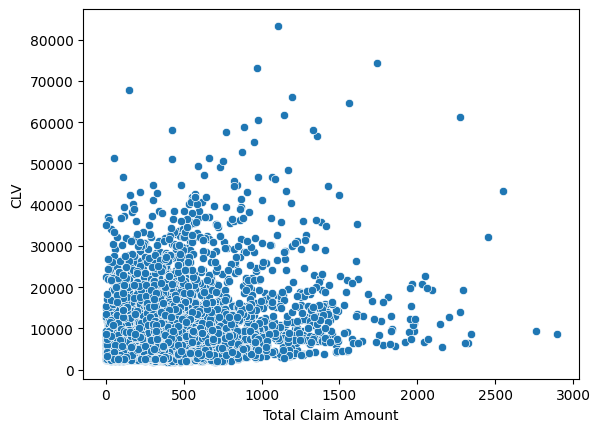

In [55]:
# prompt: create scatter chart from Total Claim Amount column with clv column

sns.scatterplot(x = df['Total Claim Amount'], y = df['CLV'])
plt.show()


<ipython-input-56-f51bc2307a0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly Premium Auto'])


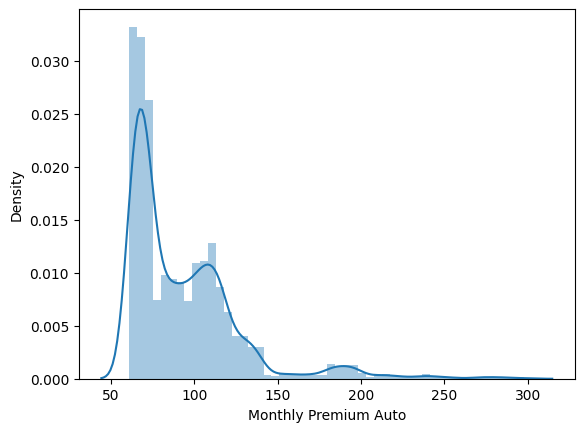

In [56]:
# prompt: create distplot from monthly premium auto

sns.distplot(df['Monthly Premium Auto'])
plt.show()


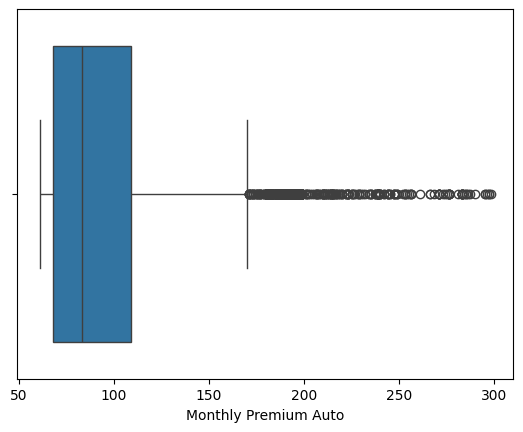

In [57]:
# prompt: create boxplot from monthly premium auto

sns.boxplot(x = df['Monthly Premium Auto'])
plt.show()


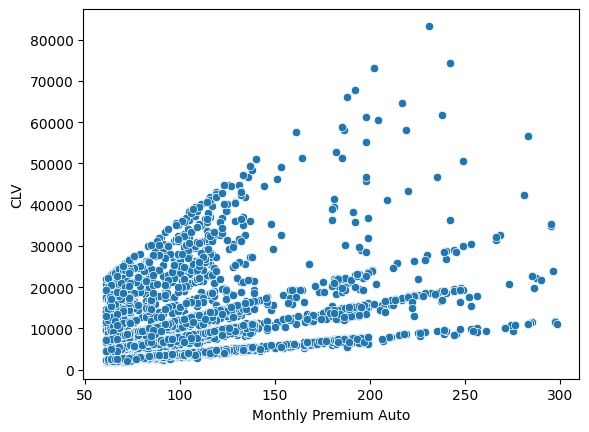

In [60]:
# prompt: create scatter chart from monthly premium auto with clv column

sns.scatterplot(x = df['Monthly Premium Auto'], y = df['CLV'])
plt.show()

In [62]:
cat_cols = df.select_dtypes(include="object")

In [63]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [64]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [66]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [68]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [69]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [70]:
for i in cat_cols:
  print("Unique values in",str(i),"is",df[i].nunique())
  print(df[i].value_counts())
  print("-------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-------------------
Unique values in EmploymentStatus is 5
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Re

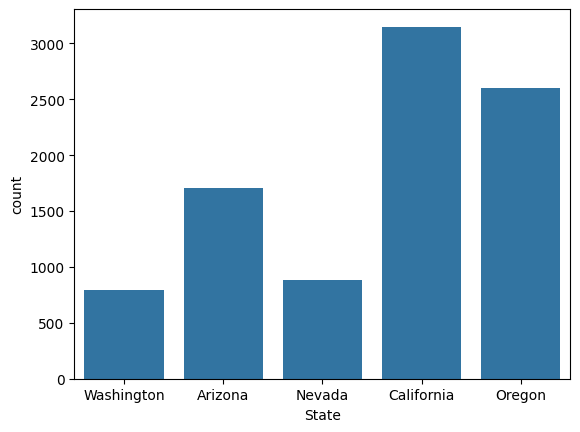

In [71]:
# prompt: create countplot from State column

sns.countplot(x = 'State', data = df)
plt.show()


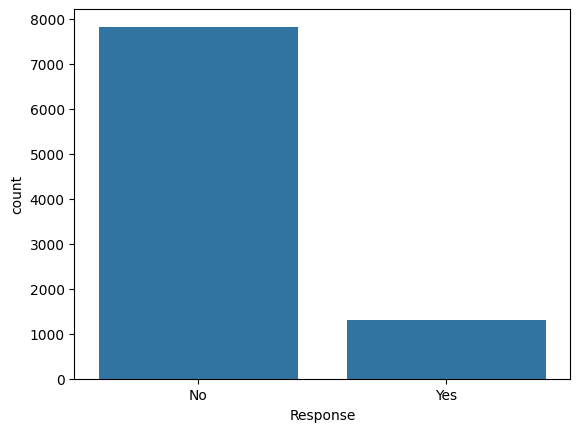

In [72]:
# prompt: create countplot for response column

sns.countplot(x = 'Response', data = df)
plt.show()


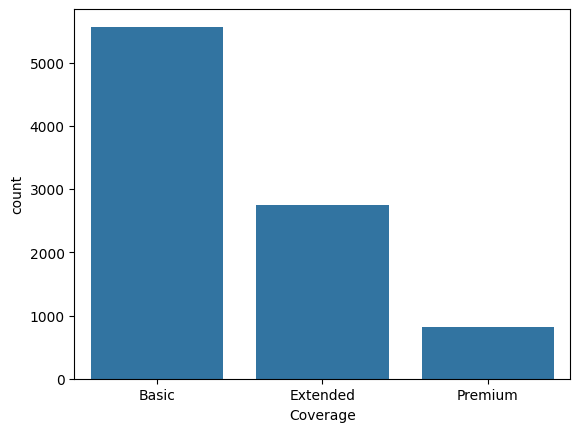

In [73]:
# prompt: create countplot for coverage column

sns.countplot(x = 'Coverage', data = df)
plt.show()


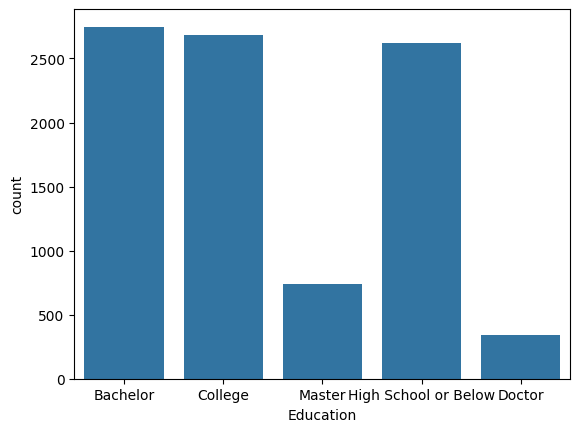

In [75]:
# prompt: create countplot for education column

sns.countplot(x = 'Education', data = df)
plt.show()

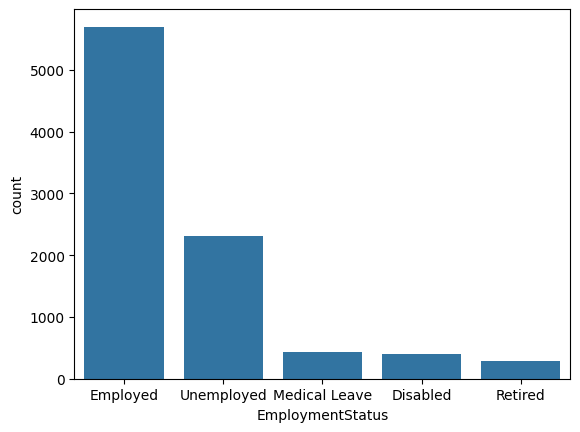

In [76]:
# prompt: create countplot sleeping from employement status column

sns.countplot(x = 'EmploymentStatus', data = df)
plt.show()


In [96]:
# prompt: create employement status value counts

df['EmploymentStatus'].value_counts(normalize=True)*100


Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

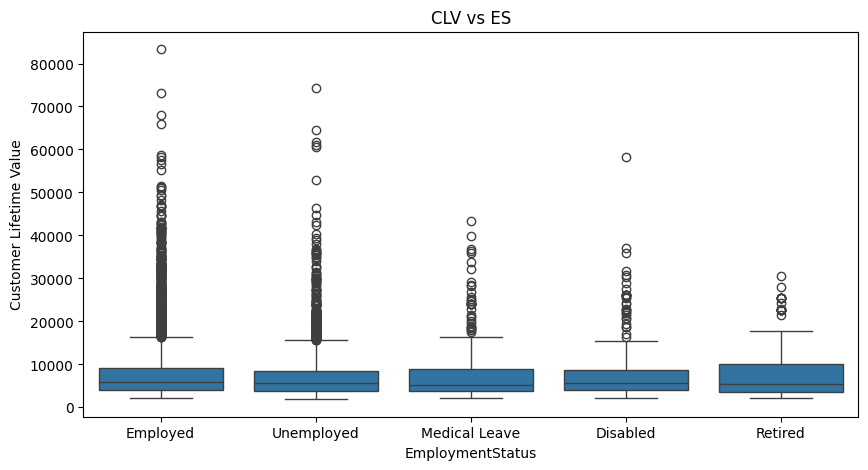

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['EmploymentStatus'], y=df['Customer Lifetime Value'])
plt.title('CLV vs ES')
plt.show()

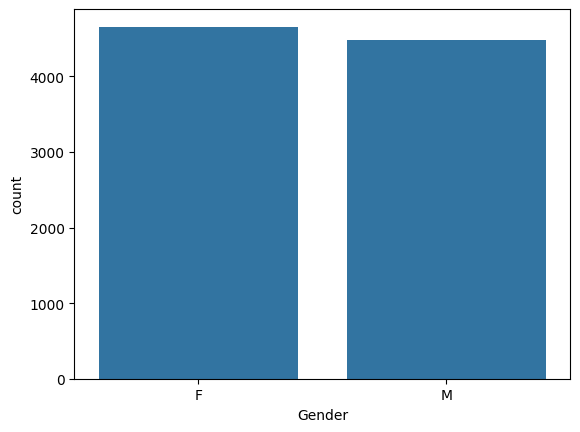

In [97]:
# prompt: create countplot for gender column

sns.countplot(x = 'Gender', data = df)
plt.show()


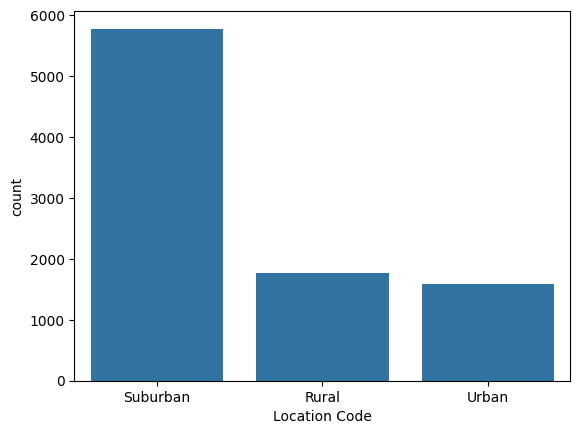

In [98]:
# prompt: create countplot for location code column

sns.countplot(x = 'Location Code', data = df)
plt.show()


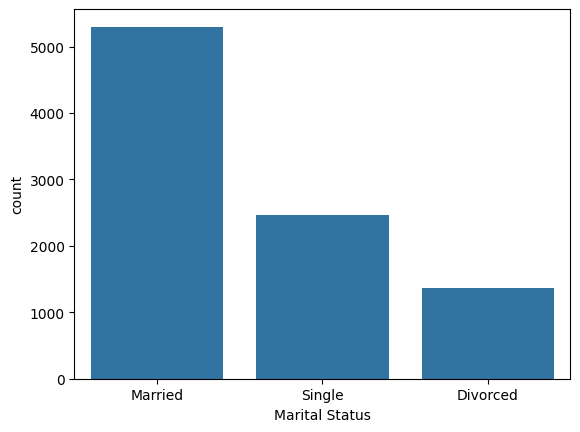

In [99]:
# prompt: create marital status countplot

sns.countplot(x = 'Marital Status', data = df)
plt.show()


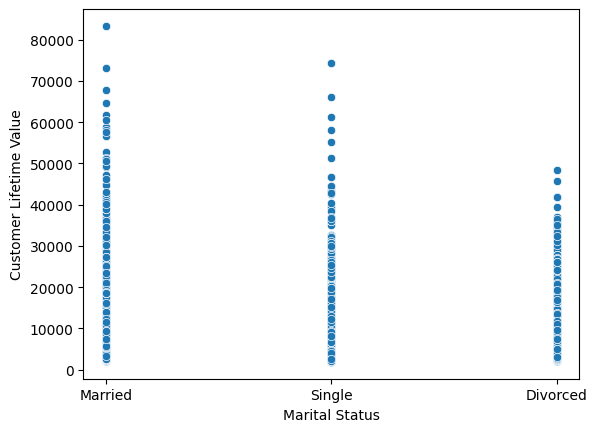

In [103]:
# prompt: create scatter chart from maritial status with clv column

sns.scatterplot(x = df['Marital Status'], y = df['Customer Lifetime Value'])
plt.show()

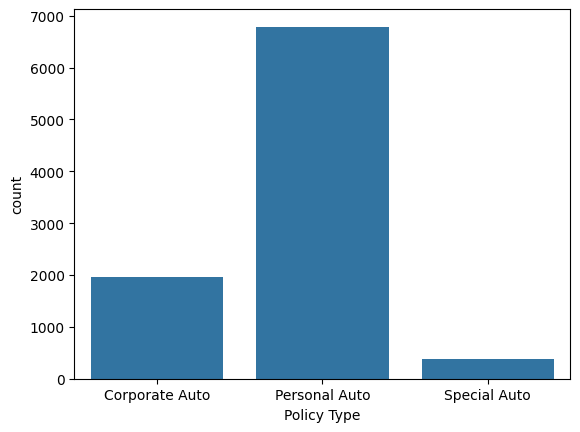

In [104]:
# prompt: create countplot for policy type column

sns.countplot(x = 'Policy Type', data = df)
plt.show()


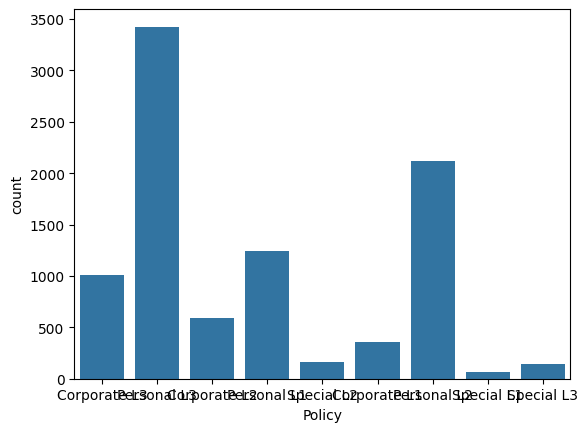

In [108]:
# prompt: create countplot for policy

sns.countplot(x = 'Policy', data = df)
plt.show()


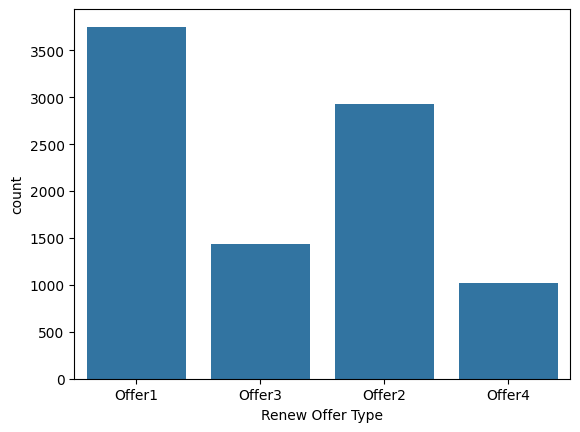

In [109]:
# prompt: create countplot for Renew Offer Type column

sns.countplot(x = 'Renew Offer Type', data = df)
plt.show()


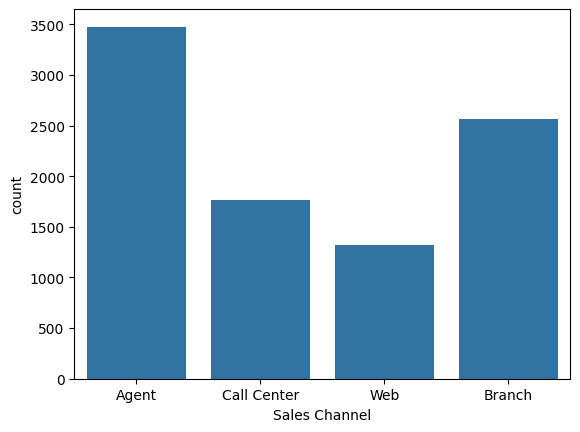

In [110]:
# prompt: create countplot for sales channel column

sns.countplot(x = 'Sales Channel', data = df)
plt.show()


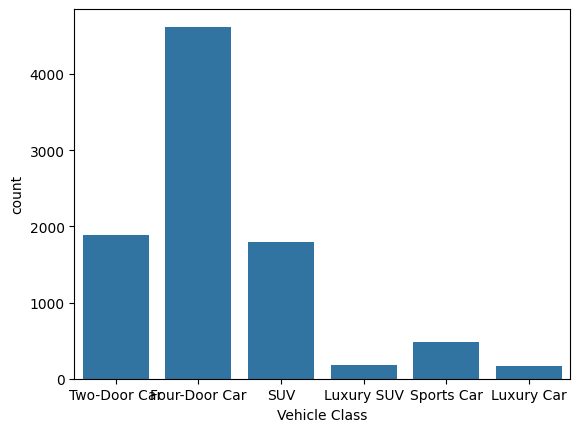

In [111]:
# prompt: create countplot for vehicle class

sns.countplot(x = 'Vehicle Class', data = df)
plt.show()


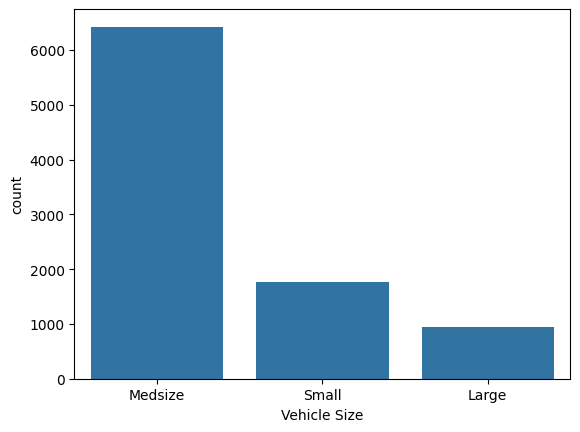

In [112]:
# prompt: create countplot for vehicle size

sns.countplot(x = 'Vehicle Size', data = df)
plt.show()


In [113]:
# prompt: convert effective to date column's value into datetime format

df['Effective To Date'] = pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)


In [114]:
# prompt: after changing to datetime format work with month

df['month'] = df['Effective To Date'].dt.month

In [115]:
df['month'] = df['month'].astype('object')

In [116]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3


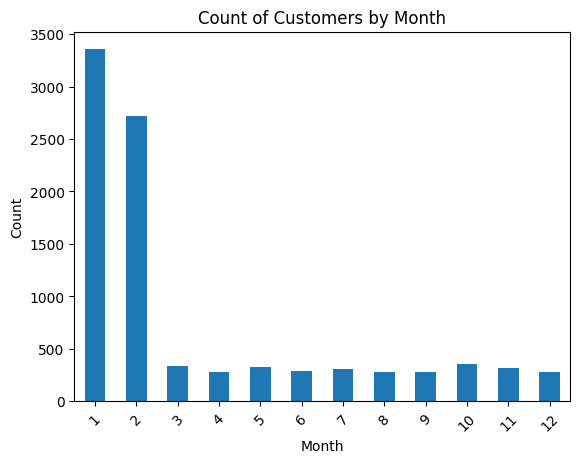

In [118]:
# prompt: count the occurances of each month with sort the month by index and create bar graph of the month by counts value

month_counts = df['month'].value_counts().sort_index()

# Create a bar graph of the month by counts value
month_counts.plot(kind='bar')

# Add title and labels
plt.title('Count of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [119]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [120]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'month'],
      dtype='object')

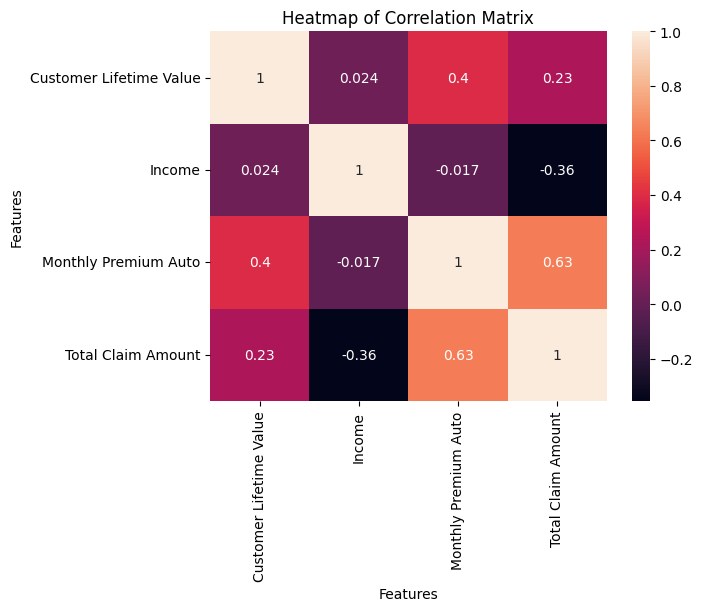

In [122]:
# prompt: create heatmap from Customer Lifetime Value, income, Monthly Premium Auto, Total Claim Amount

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']].corr(), annot=True)

# Add a title and labels
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the heatmap
plt.show()

In [124]:
stats.shapiro(df['Customer Lifetime Value'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

In [127]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [128]:
manwhiteneyy = []
anova = []
for i in columns_cat:
  if (df[i].nunique()>2):
    anova.append(i)
else:
  manwhiteneyy.append(i)
print("Anova: ", anova)
print("TTest: ", manwhiteneyy)

Anova:  ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest:  ['Number of Policies']


In [129]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [130]:
catg=pd.get_dummies(cat_cols,drop_first=True)
catg

,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [132]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Customer_AA11235,Customer_AA16582,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [135]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [138]:
X=dfn.drop(['CLV'], axis=1)
y=dfn['CLV']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [139]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [140]:
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 9183)
(6393,)
(2741, 9183)
(2741,)


In [142]:
# prompt: create linear regression algorithm for above data with printing score for both test and train set

from sklearn.linear_model import LinearRegression

model.score(X_test, y_test)

0.1585232377674567

In [145]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print (f'R^2 score for train: {lr.score(X_train, y_train)}')
print (f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 0.1585232377674567


In [147]:
y_pred = model.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [149]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE", mean_absolute_error (y_test,y_pred))
print('R-squared: ', r2_score (y_test,y_pred))

RMSE: 6617.391707041234
MAE 3966.906738479852
R-squared:  0.1585232377674567


In [152]:
from sklearn.tree import DecisionTreeRegressor

In [153]:
dt = DecisionTreeRegressor (random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE", mean_absolute_error(y_test,y_pred))
print('R-squared: ', r2_score (y_test, y_pred))

RMSE: 4968.477878964912
MAE 1545.82956511857
R-squared:  0.525632242443886


In [163]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Special L1','Policy_Special L2','Policy_Special L3'], axis=1)
y=np.log(dfn['CLV'])
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor (random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared: ', r2_score (y_test,y_pred))

RMSE: 0.20723034399939494
MAE 0.08870645258520361
R-squared:  0.9039592865869303


In [167]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

params = {
    'max_depth' : [10,20,30],
    'n_estimators' : [100,200,50],
    "bootstrap" : [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [ ]:
grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True)
grid.fit(X,y)
grid.best_params__

In [ ]:
rf=RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE", mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score (y_test,y_pred))

In [173]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost = AdaBoostRegressor(RandomForestRegressor(max_depth=5, criterion='mse'), n_estimators=150)
adaboost.fit(X_train, y_train)

In [ ]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,_pred)))
print("MAE", mean_absolute_error(y_test,y_pred))
print('R-squared: ', r2_score (y_test,y_pred))